<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1493 non-null   int64  
 1   sex                1493 non-null   int64  
 2   chestpaintype      1493 non-null   int64  
 3   restingbps         1493 non-null   int64  
 4   cholesterol        1493 non-null   int64  
 5   fastingbloodsugar  1493 non-null   int64  
 6   restingecg         1493 non-null   int64  
 7   maxheartrate       1493 non-null   int64  
 8   exerciseangina     1493 non-null   int64  
 9   oldpeak            1493 non-null   float64
 10  STslope            1493 non-null   int64  
 11  target             1493 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 140.0 KB
age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
sex : [1

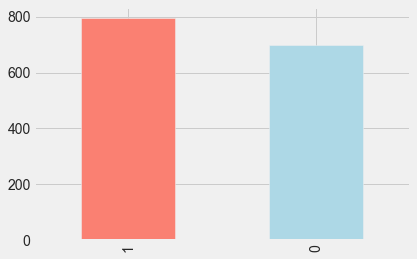

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
bankdata = pd.read_csv("dataset.csv")
bankdata.info()
bankdata.head()

bankdata.shape
pd.set_option("display.float", "{:.2f}".format)
bankdata.describe()
bankdata.target.value_counts()
bankdata.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
bankdata.isna().sum()
categorical_val = []
continous_val = []
for column in bankdata.columns:
    print('==============================')
    print(f"{column} : {bankdata[column].unique()}")
    if len(bankdata[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)



categorical_val.remove('target')
bankdata2 = pd.get_dummies(bankdata, columns = categorical_val)
#bankdata2.head()
#print(bankdata.columns)
#print(bankdata2.columns)

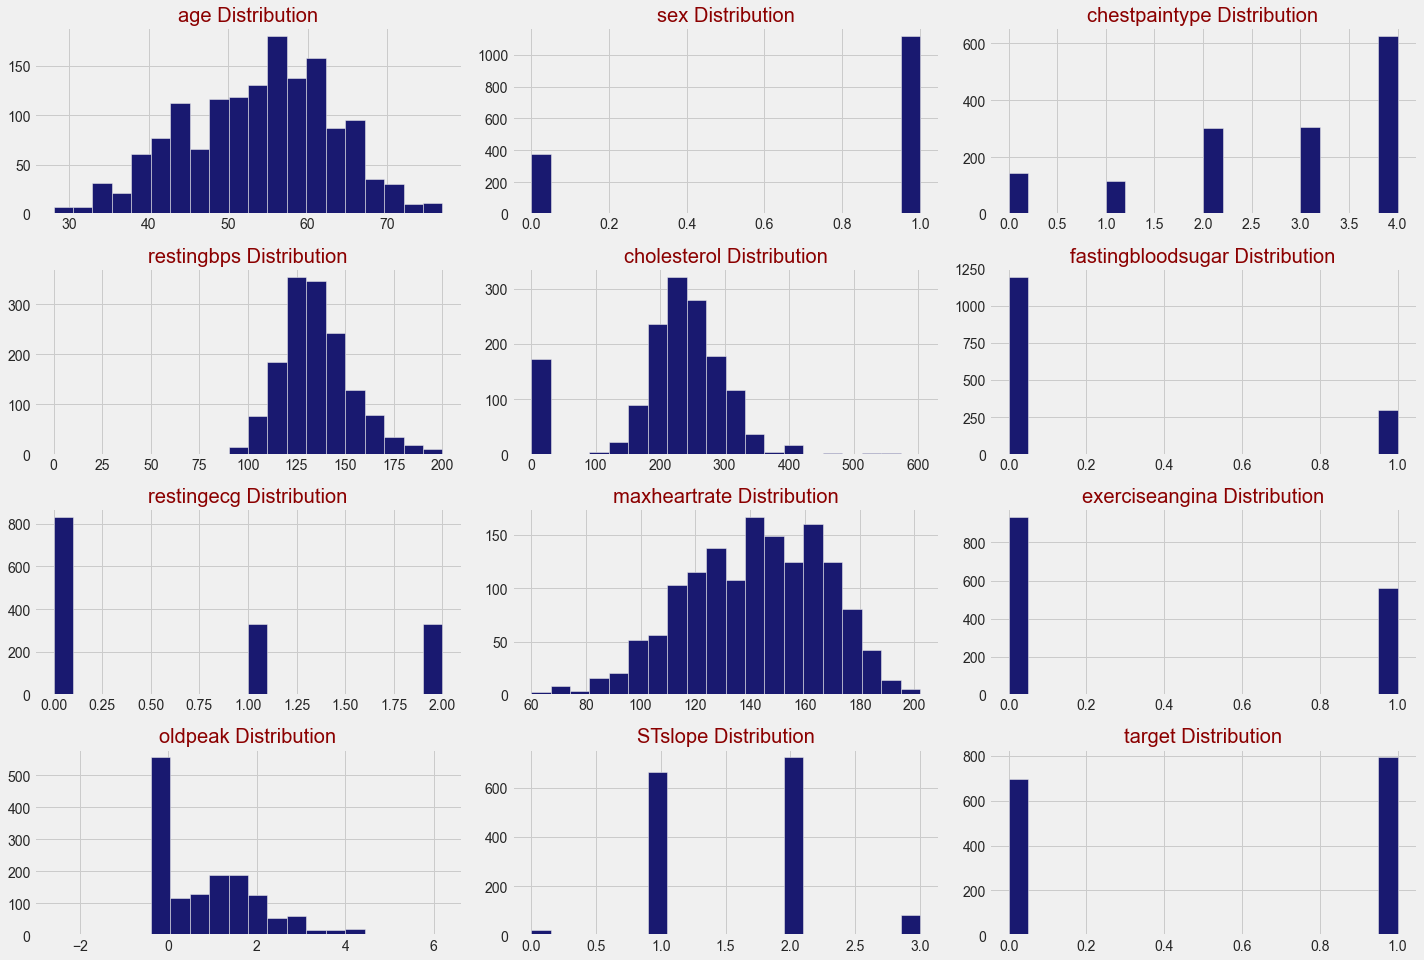



                                      SVM                                       
[[112  27]
 [ 12 148]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       139
           1       0.85      0.93      0.88       160

    accuracy                           0.87       299
   macro avg       0.87      0.87      0.87       299
weighted avg       0.87      0.87      0.87       299

Training Accuracy =  99.91624790619765 %
Testing Accuracy =  86.95652173913044 %


########################################################################


                                      Random Forest                                       
[[124  15]
 [ 11 149]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       139
           1       0.91      0.93      0.92       160

    accuracy                           0.91       299
   macro avg       0.91      0.91      0.91       299
weighted avg       0.91

c:\users\dell\pycharmprojects\untitled10\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(bankdata,bankdata.columns,6,3)

#
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'restingbps', 'cholesterol', 'maxheartrate', 'oldpeak']
bankdata2[col_to_scale] = s_sc.fit_transform(bankdata2[col_to_scale])

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


bankdata2 = bankdata2.dropna()
X = bankdata2.drop('target', axis=1)
Y = bankdata2.target



from sklearn.model_selection import train_test_split, RepeatedKFold

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state= 204)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', gamma=0.75, C=10.0)
svclassifier.fit(X_train, Y_train)
SVC(kernel='rbf', gamma=0.75, C=10.0)
y_pred = svclassifier.predict(X_test)
print("\n")
print("                                      SVM                                       ")
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

test_score = accuracy_score(Y_test, svclassifier.predict(X_test)) * 100
train_score = accuracy_score(Y_train, svclassifier.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")



#svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

#params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          #"gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          #"kernel":('linear', 'poly', 'rbf')}
from sklearn.ensemble import RandomForestClassifier
#trees number 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)
y_pred = rf_clf.predict(X_test)
print("\n")
print("                                      Random Forest                                       ")
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

test_score = accuracy_score(Y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, rf_clf.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")


from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, Y_train)
y_pred=lr_clf.predict(X_test)
print("\n")
print("                                     Logistic Regression                                      ")
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
test_score = accuracy_score(Y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, lr_clf.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
y_pred=knn_clf.predict(X_test)
print("\n")
print("                                      K-Neighbors                                     ")
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
test_score = accuracy_score(Y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, knn_clf.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)
y_pred=tree_clf.predict(X_test)
print("\n")
print("                                      Decision Tree                                     ")
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
test_score = accuracy_score(Y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, tree_clf.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")
print("\n")



from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder , LabelBinarizer, MinMaxScaler, OrdinalEncoder
from sklearn.multiclass import OneVsRestClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train,Y_train)
y_pred= NN.predict(X_test)
print("                                      Neural Network                                     ")
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

test_score = accuracy_score(Y_test, NN.predict(X_test)) * 100
train_score = accuracy_score(Y_train, NN.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")
print("\n")





####################################################
print("Output Accuracy after applying K-Fold Cross Validation")
print("\n")
from numpy import mean
from  numpy import std
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits= 20, random_state= 1, shuffle= True)
model = RandomForestClassifier()
scores = cross_val_score(model, X,Y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Random Forest Accuracy: %.3f'  % (mean (scores)))


model = SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(model, X,Y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('SVM  Accuracy: %.3f ' % (mean (scores)))



model = LogisticRegression(solver='liblinear')
scores = cross_val_score(model, X,Y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Logistic Regression Accuracy: %.3f ' % (mean (scores) ))




model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
scores = cross_val_score(model, X,Y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Neural Network Accuracy: %.3f ' % (mean (scores)))


model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, X,Y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Decision Tree Accuracy: %.3f ' % (mean (scores)))


model = KNeighborsClassifier()
scores = cross_val_score(model, X,Y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('KNN Accuracy: %.3f ' % (mean (scores)))
